# Hotel Booking Demand 
### Exploratory Data Analysis & Feature Engineering

<img src="https://github.com/robinyUArizona/MIS-586-Big-Data-Project/blob/master/hotel_booking_pic.PNG?raw=true" style="width:1100px;height:300px" />

## Problem Statement:
The hospitality industry has evolved a lot in the last few years. The growth of online distribution has grown by 46% from 2014 to 2018. The hold has shifted from manual bookings to online travel agencies by almost 68% in 2018. The hospitality industry is facing issues in revenue generation due to ease of cancellations of the bookings made. Based on the data collected in 2018, almost 40% of the revenue is cancelled before arrival. This comes with the possibility of easy online bookings and their cancellations. It has become crucial to perform an analysis to help the industry to maximize its revenue generation and predict false bookings and probable cancellations in order to use their resources judiciously. Based on our assumption, there may be many factors affecting the cancellations like weather changes, better deals available or in general no cost bookings. Based on the data available to us, we were able to observe that the average length of stay has also diminished during this course of time and the reservations for longer periods are most likely to be canceled.

Our main aim with this project is to help the hospitality industry generate the maximum revenue with the resources available to them based on the factors identified. Specifically, in this project, our goal is to:
- Predict the future possibility of cancellation – Factors like period of stay, weather, holiday season and time of the year for the booking may play a crucial role in determining whether the booking will be productive or not. This will determine whether the booking made will be productive based on historical data.
- Predict the future possibility of no shows – This would help us predict if the bookings made will be unproductive. If a booking is made with false names or via a particular travel agency and will it lead to a last-minute cancellation or people just not showing up.

## Table of contents:

    1.Data Exploration
    
        1.1 Importing libraries
        1.2 Load the data
        1.3 Exploratory Data Analysis
            1.3.1 Summary of features
            1.3.2 Find and remove the duplicate records (rows)
            1.3.3 Listing numerical and categorical data types columns
            1.3.4 Clean the data: Data Wrangling
            1.3.5 Features Analysis
                A. Analysis of Target Variable 'is_canceled'
                B. Function to plot
                C. Analysis of columns with missing value
                D. Analysis of other independent Features
        1.4 Feature Selction
            1.4.1 Numerical Columns
                A. Correlation Matrix and Heat-map
                B. Some more plots
                C. Recursive Feature Elimination
                D. Feature Importance (ExtraTreesClassifier())
            1.4.2 Categorical Columns
                A. Chi Square Test & Fisher Score
        1.5 Saving dataframe for Model Training

#### Library Installation

In [1]:
# import sys
# !conda install --yes --prefix {sys.prefix} plotly


## 1. Data Exploration

### 1.1 Importing libraries

In [2]:
" Common libraries " 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
%matplotlib inline

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import ExtraTreesClassifier

from itertools import cycle, islice


### 1.2 Load the data

In [3]:
""" 
    - load the data into a Pandas dataframe
    - display first 5 rows from dataframe 
    - information for the datasets
    
"""
hotel_data = pd.read_csv("hotel_bookings.csv")
print("Number of records (rows) Hotel Bookings Demand Datasets: ", hotel_data.shape[0])
print("Number of features (columns) Hotel Bookings Demand Datasets: ", hotel_data.shape[1])
print("\nColumns names of the hotel booking datasets: \n", hotel_data.columns.tolist())

print("\nFirst 5 records of the datasets: ")
display(hotel_data.head())

print("\n\n\nHotel Bookings Demand Datasets Information: ")
display(hotel_data.info())

Number of records (rows) Hotel Bookings Demand Datasets:  119390
Number of features (columns) Hotel Bookings Demand Datasets:  32

Columns names of the hotel booking datasets: 
 ['hotel', 'is_canceled', 'lead_time', 'arrival_date_year', 'arrival_date_month', 'arrival_date_week_number', 'arrival_date_day_of_month', 'stays_in_weekend_nights', 'stays_in_week_nights', 'adults', 'children', 'babies', 'meal', 'country', 'market_segment', 'distribution_channel', 'is_repeated_guest', 'previous_cancellations', 'previous_bookings_not_canceled', 'reserved_room_type', 'assigned_room_type', 'booking_changes', 'deposit_type', 'agent', 'company', 'days_in_waiting_list', 'customer_type', 'adr', 'required_car_parking_spaces', 'total_of_special_requests', 'reservation_status', 'reservation_status_date']

First 5 records of the datasets: 


,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03





Hotel Bookings Demand Datasets Information: 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                        

None

### 1.3 Exploratory Data  Analysis

#### 1.3.1 Summary of numerical and categorical features

In [4]:
## Summary of numerical features
print("\nInitial Summary of Statistics for numerical columns: ")
display(hotel_data.describe(include = [np.number]).T)

## Summary of categorical features
print("\nInitial Summary of Statistics for categorical columns: ")
display(hotel_data.describe(include = ['O']).T)


Initial Summary of Statistics for numerical columns: 


,count,mean,std,min,25%,50%,75%,max
is_canceled,119390.0,0.370416,0.482918,0.00,0.00,0.000,1.0,1.0
lead_time,119390.0,104.011416,106.863097,0.00,18.00,69.000,160.0,737.0
arrival_date_year,119390.0,2016.156554,0.707476,2015.00,2016.00,2016.000,2017.0,2017.0
arrival_date_week_number,119390.0,27.165173,13.605138,1.00,16.00,28.000,38.0,53.0
arrival_date_day_of_month,119390.0,15.798241,8.780829,1.00,8.00,16.000,23.0,31.0
stays_in_weekend_nights,119390.0,0.927599,0.998613,0.00,0.00,1.000,2.0,19.0
stays_in_week_nights,119390.0,2.500302,1.908286,0.00,1.00,2.000,3.0,50.0
adults,119390.0,1.856403,0.579261,0.00,2.00,2.000,2.0,55.0
children,119386.0,0.103890,0.398561,0.00,0.00,0.000,0.0,10.0
babies,119390.0,0.007949,0.097436,0.00,0.00,0.000,0.0,10.0



Initial Summary of Statistics for categorical columns: 


,count,unique,top,freq
hotel,119390,2,City Hotel,79330
arrival_date_month,119390,12,August,13877
meal,119390,5,BB,92310
country,118902,177,PRT,48590
market_segment,119390,8,Online TA,56477
distribution_channel,119390,5,TA/TO,97870
reserved_room_type,119390,10,A,85994
assigned_room_type,119390,12,A,74053
deposit_type,119390,3,No Deposit,104641
customer_type,119390,4,Transient,89613


#### 1.3.2 Find and remove the duplicate records (rows) in hotel booking demand datasets

In [5]:
"""
    - find and remove duplicate rows in hotel_data
"""

# check the number of duplicated rows
# no. of rows is identical to other row or rows
print("No. of duplicate rows: ", hotel_data.duplicated(keep='first').sum()) 

# Check for this duplicate rows as a dataframe
display(hotel_data.loc[hotel_data.duplicated(keep='first')])


### Remove the duplicate rows #####
new_hotel_data = hotel_data.drop_duplicates(keep='first')
# check the dataset dimension
print("\nDimesnion of hotel_data after removing duplicates: ", new_hotel_data.shape)


No. of duplicate rows:  31994


,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
5,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.00,0,1,Check-Out,2015-07-03
22,Resort Hotel,0,72,2015,July,27,1,2,4,2,...,No Deposit,250.0,NaN,0,Transient,84.67,0,1,Check-Out,2015-07-07
43,Resort Hotel,0,70,2015,July,27,2,2,3,2,...,No Deposit,250.0,NaN,0,Transient,137.00,0,1,Check-Out,2015-07-07
138,Resort Hotel,1,5,2015,July,28,5,1,0,2,...,No Deposit,240.0,NaN,0,Transient,97.00,0,0,Canceled,2015-07-01
200,Resort Hotel,0,0,2015,July,28,7,0,1,1,...,No Deposit,240.0,NaN,0,Transient,109.80,0,3,Check-Out,2015-07-08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119349,City Hotel,0,186,2017,August,35,31,0,3,2,...,No Deposit,9.0,NaN,0,Transient,126.00,0,2,Check-Out,2017-09-03
119352,City Hotel,0,63,2017,August,35,31,0,3,3,...,No Deposit,9.0,NaN,0,Transient-Party,195.33,0,2,Check-Out,2017-09-03
119353,City Hotel,0,63,2017,August,35,31,0,3,3,...,No Deposit,9.0,NaN,0,Transient-Party,195.33,0,2,Check-Out,2017-09-03
119354,City Hotel,0,63,2017,August,35,31,0,3,3,...,No Deposit,9.0,NaN,0,Transient-Party,195.33,0,2,Check-Out,2017-09-03



Dimesnion of hotel_data after removing duplicates:  (87396, 32)


#### 1.3.3 Listing numerical and categorical data types columns

In [6]:
# print(" Columns names and their types: \n", hotel_data.dtypes)
# num_int_type = hotel_data.select_dtypes(include = [np.number]).columns.tolist()
num_int_type = hotel_data.select_dtypes(include='int64').columns.tolist()
print("\nNumeric-Integer Types columns name: \n", num_int_type)

num_float_type = hotel_data.select_dtypes(include='float64').columns.tolist()
print("\nNumeric-Float Types columns name: \n", num_float_type)

cat_object_type = hotel_data.select_dtypes(include='object').columns.tolist()
print("\n\nCategorical Types columns name: \n", cat_object_type)


Numeric-Integer Types columns name: 
 ['is_canceled', 'lead_time', 'arrival_date_year', 'arrival_date_week_number', 'arrival_date_day_of_month', 'stays_in_weekend_nights', 'stays_in_week_nights', 'adults', 'babies', 'is_repeated_guest', 'previous_cancellations', 'previous_bookings_not_canceled', 'booking_changes', 'days_in_waiting_list', 'required_car_parking_spaces', 'total_of_special_requests']

Numeric-Float Types columns name: 
 ['children', 'agent', 'company', 'adr']


Categorical Types columns name: 
 ['hotel', 'arrival_date_month', 'meal', 'country', 'market_segment', 'distribution_channel', 'reserved_room_type', 'assigned_room_type', 'deposit_type', 'customer_type', 'reservation_status', 'reservation_status_date']


##### Checking summary of numerical and categorical features
- To know more about missing values in the hotel booking demand dataset
- Summarizing numerical and categorical columns seperately

In [7]:
## Summary of numerical features
print("\nSummary of Statistics for numerical columns: ")
num_type = num_int_type + num_float_type
display(new_hotel_data[num_type].describe().T)
# display(new_hotel_data.describe(include = [np.number]).T)

## Summary of categorical features
print("\nSummary of Statistics for categorical columns: ")
display(new_hotel_data[cat_object_type].describe().T)
# display(new_hotel_data.describe(include = ['O']).T)

print(new_hotel_data[cat_object_type].hotel.value_counts())


# just checking size for cat and num
print("\nTotal must be 32 features otherwise missing some columns")
print(new_hotel_data[num_type].shape)
print(new_hotel_data[cat_object_type].shape)


Summary of Statistics for numerical columns: 


,count,mean,std,min,25%,50%,75%,max
is_canceled,87396.0,0.274898,0.446466,0.00,0.0,0.0,1.0,1.0
lead_time,87396.0,79.891368,86.052325,0.00,11.0,49.0,125.0,737.0
arrival_date_year,87396.0,2016.210296,0.686102,2015.00,2016.0,2016.0,2017.0,2017.0
arrival_date_week_number,87396.0,26.838334,13.674572,1.00,16.0,27.0,37.0,53.0
arrival_date_day_of_month,87396.0,15.815541,8.835146,1.00,8.0,16.0,23.0,31.0
stays_in_weekend_nights,87396.0,1.005263,1.031921,0.00,0.0,1.0,2.0,19.0
stays_in_week_nights,87396.0,2.625395,2.053584,0.00,1.0,2.0,4.0,50.0
adults,87396.0,1.875795,0.626500,0.00,2.0,2.0,2.0,55.0
babies,87396.0,0.010824,0.113597,0.00,0.0,0.0,0.0,10.0
is_repeated_guest,87396.0,0.039075,0.193775,0.00,0.0,0.0,0.0,1.0



Summary of Statistics for categorical columns: 


,count,unique,top,freq
hotel,87396,2,City Hotel,53428
arrival_date_month,87396,12,August,11257
meal,87396,5,BB,67978
country,86944,177,PRT,27453
market_segment,87396,8,Online TA,51618
distribution_channel,87396,5,TA/TO,69141
reserved_room_type,87396,10,A,56552
assigned_room_type,87396,12,A,46313
deposit_type,87396,3,No Deposit,86251
customer_type,87396,4,Transient,71986


City Hotel      53428
Resort Hotel    33968
Name: hotel, dtype: int64

Total must be 32 features otherwise missing some columns
(87396, 20)
(87396, 12)


In [8]:
# Data Description for prsentation
## Summary of few numerical features

num_choice = ['is_canceled', 'lead_time','arrival_date_year', 
              'stays_in_weekend_nights', 'stays_in_week_nights', 
              'adults', 'children',
              'required_car_parking_spaces', 'total_of_special_requests',
              'company', 'agent']
print("Summary of Numerical Features:")
display(new_hotel_data[num_choice].describe().T)


cat_choice = ['hotel', 'arrival_date_month', 'meal', 'country', 
              'market_segment', 'deposit_type', 'customer_type']

## Summary of categorical features
print("\nSummary of Categorical Features: ")
display(new_hotel_data[cat_choice].describe().T)


Summary of Numerical Features:


,count,mean,std,min,25%,50%,75%,max
is_canceled,87396.0,0.274898,0.446466,0.0,0.0,0.0,1.0,1.0
lead_time,87396.0,79.891368,86.052325,0.0,11.0,49.0,125.0,737.0
arrival_date_year,87396.0,2016.210296,0.686102,2015.0,2016.0,2016.0,2017.0,2017.0
stays_in_weekend_nights,87396.0,1.005263,1.031921,0.0,0.0,1.0,2.0,19.0
stays_in_week_nights,87396.0,2.625395,2.053584,0.0,1.0,2.0,4.0,50.0
adults,87396.0,1.875795,0.626500,0.0,2.0,2.0,2.0,55.0
children,87392.0,0.138640,0.455881,0.0,0.0,0.0,0.0,10.0
required_car_parking_spaces,87396.0,0.084226,0.281533,0.0,0.0,0.0,0.0,8.0
total_of_special_requests,87396.0,0.698567,0.831946,0.0,0.0,0.0,1.0,5.0
company,5259.0,183.081384,130.557608,6.0,47.0,169.0,263.0,543.0



Summary of Categorical Features: 


,count,unique,top,freq
hotel,87396,2,City Hotel,53428
arrival_date_month,87396,12,August,11257
meal,87396,5,BB,67978
country,86944,177,PRT,27453
market_segment,87396,8,Online TA,51618
deposit_type,87396,3,No Deposit,86251
customer_type,87396,4,Transient,71986


####  1.3.4 Clean the data: Data Wrangling
##### Data Wrangling is the process of converting data from the initial format to a format that may be better for analysis.

<ul>
    <li>Identify and handle missing values
        <ul>
            <li>Nested Identify missing values</li>
            <li>Nested Deal with missing values</li>
            <li>Nested Correct data format</li>
        </ul>
    </li>
    <li> Number of methods to deal with missing values
        <ul>
            <li>df.dropna() -- Drop missing observations</li>
            <li>df.dropna(how='all') -- Drop observations where all cells is NA </li>
            <li>df.dropna(axis=1, how='all') -- Drop column if all the values aremissing</li>
            <li>df.dropna(thresh = 5) -- Drop rows that contain less than 5 non-missing values</li>
            <li>df.fillna(0) -- Replace missing values with zeros </li>
            <li>df.isnull() -- returns True if the value is missing</li>
        </ul>
    </li>
</ul>


In [9]:
"""
    - Identify the missing values
"""
## 
missing_data = new_hotel_data.isnull().sum()
print("No. of missing data in each columns: \n", missing_data)

# print("\n Columns name of hotel bookings demand dataset: \n", new_hotel_data.columns )

columns_with_missing_value = new_hotel_data.columns[hotel_data.isnull().any()].tolist()
print("\n Columns name which has missing value: ", columns_with_missing_value)

"""
 - Robin: I checked the missing values and I found that all missing values are already NaN
  check using: hotel_data.isna().sum()
 - NaN (Not a Number), which is Python's default missing value marker

"""

columns_with_nan = new_hotel_data.columns[hotel_data.isna().any()].tolist()
print("\n Columns name which has NaN: ", columns_with_nan)

## verifying
print("\n Missing Values are equals to NaN: ", columns_with_missing_value == columns_with_nan)


No. of missing data in each columns: 
 hotel                                 0
is_canceled                           0
lead_time                             0
arrival_date_year                     0
arrival_date_month                    0
arrival_date_week_number              0
arrival_date_day_of_month             0
stays_in_weekend_nights               0
stays_in_week_nights                  0
adults                                0
children                              4
babies                                0
meal                                  0
country                             452
market_segment                        0
distribution_channel                  0
is_repeated_guest                     0
previous_cancellations                0
previous_bookings_not_canceled        0
reserved_room_type                    0
assigned_room_type                    0
booking_changes                       0
deposit_type                          0
agent                             12193
c

### 1.3.5 Features Analysis

##### A. Analysis of Target Variable 'is_cancelled'

Text(0, 0.5, 'Total Count')

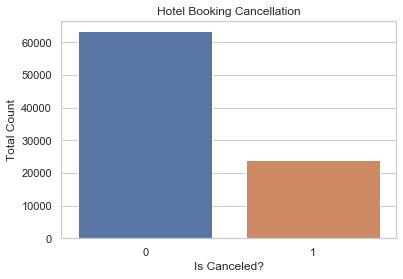

In [10]:
## is_cancelled
plt.figure(figsize=(6, 4))
sns.set(style="whitegrid")
ax = sns.countplot(x="is_canceled", data=new_hotel_data)
plt.title('Hotel Booking Cancellation')
plt.xlabel('Is Canceled?')
plt.ylabel('Total Count')

In [11]:
booking_cancel = (new_hotel_data['is_canceled'] == 1).sum()
print("No. of booking canceled: ", booking_cancel)
not_booking_cancel = (new_hotel_data['is_canceled'] == 0).sum()
print("No. of booking not canceled: ", not_booking_cancel)
total_booking = booking_cancel + not_booking_cancel
print("Total count: ", total_booking)
print("% Base line Accuracy based on majority class: ", (not_booking_cancel/total_booking) * 100, "%" )

No. of booking canceled:  24025
No. of booking not canceled:  63371
Total count:  87396
% Base line Accuracy based on majority class:  72.5101835324271 %


In [12]:
# ## Some summary Table
# booking_cancell = new_hotel_data[new_hotel_data['is_canceled'] == 1]
# display(booking_cancell.head())
# not_booking_cancell = new_hotel_data[new_hotel_data['is_canceled'] == 0]
# display(not_booking_cancell.head())

##### B. Function to plot

In [13]:
""" Visualize the Numerical Features """
def visualize_num_feature(new_hotel_data):
    plt.figure(figsize = (14, 6))
    plt.subplot(1,2,1)
    sns.boxplot(new_hotel_data)
    plt.subplot(1,2,2)
    sns.distplot(new_hotel_data, bins=20)
    plt.show()
 
""" Use IQR rule to identify potential outliers"""
def stat_summary(new_hotel_data):
    stat =  new_hotel_data.describe()
    print(stat)
    IQR = stat['75%'] - stat['25%']
    upper = stat['75%'] + 1.5 * IQR
    lower = stat['25%'] - 1.5 * IQR
    print('The upper and lower bounds for suspected outliers are {} and {}' .format(upper, lower))
    

##### C. Analysis of columns with missing value:  ['children', 'country', 'agent', 'company']

In [14]:
missing_col = new_hotel_data[['children', 'country', 'agent', 'company']]
missing_col.info()
missing_col.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 87396 entries, 0 to 119389
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   children  87392 non-null  float64
 1   country   86944 non-null  object 
 2   agent     75203 non-null  float64
 3   company   5259 non-null   float64
dtypes: float64(3), object(1)
memory usage: 5.8+ MB


,children,country,agent,company
0,0.0,PRT,NaN,NaN
1,0.0,PRT,NaN,NaN
2,0.0,GBR,NaN,NaN
3,0.0,GBR,304.0,NaN
4,0.0,GBR,240.0,NaN


Missing values in 'company' column:  82137
Not missing values in 'company' column:  5259


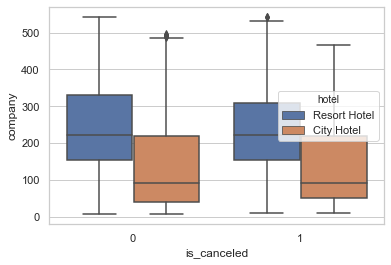

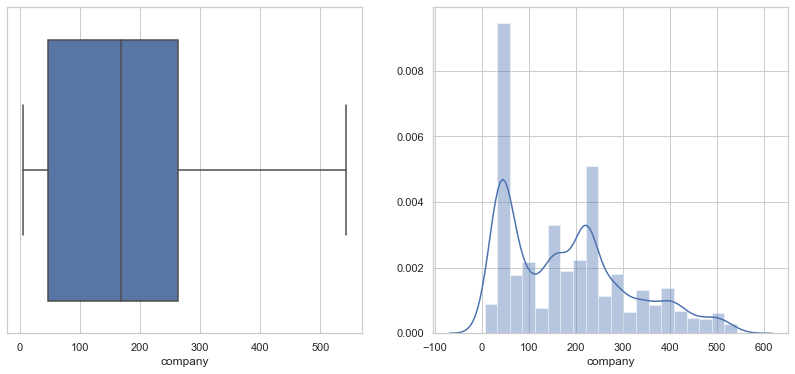

count    5259.000000
mean      183.081384
std       130.557608
min         6.000000
25%        47.000000
50%       169.000000
75%       263.000000
max       543.000000
Name: company, dtype: float64
The upper and lower bounds for suspected outliers are 587.0 and -277.0


In [15]:
"""
    - Analysis of 'company" Feature
    - ID of the company/entity that made the booking or responsible for paying the booking. 
    - ID is presented instead of designation for anonymity reasons
"""
# display(missing_col['company'].value_counts())
print("Missing values in 'company' column: ", missing_col['company'].isnull().sum())
print("Not missing values in 'company' column: ",missing_col['company'].notnull().sum())

## Wow: Missing values are way higher --- its okay to remove this column

## Relationship between "company" and target variable 'is_canceled'
sns.boxplot(x = 'is_canceled', y = 'company', data = hotel_data, hue='hotel')

## Checking distribution of company
visualize_num_feature(missing_col['company'])
stat_summary(missing_col['company'])


#### Removing <font color=red>'company'</font> feature

In [16]:
##  Deleting 'company' colum
# print("Name of all columns: \n", new_hotel_data.columns.tolist())
new_hotel_data = new_hotel_data.drop('company', axis=1)
# print("\n\nName of all columns: \n", new_hotel_data.columns.tolist())

Missing values in 'agent' column:  12193
Not missing values in 'agent' column:  75203


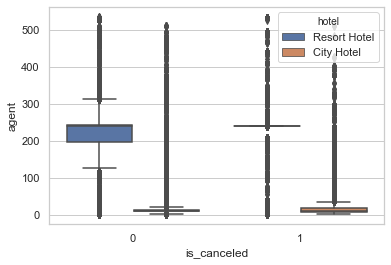

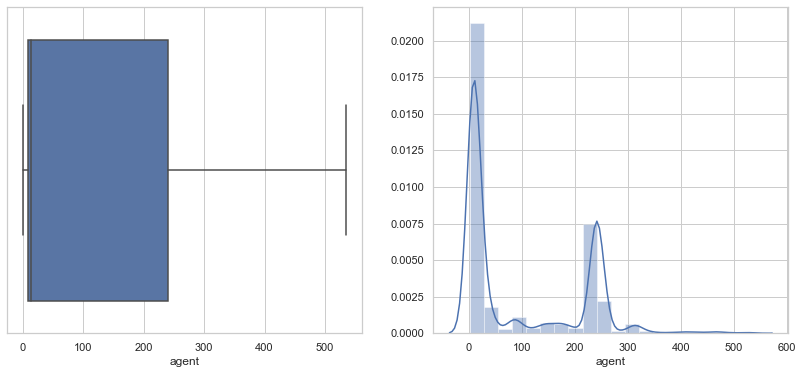

count    75203.000000
mean        94.138306
std        113.188172
min          1.000000
25%          9.000000
50%         14.000000
75%        240.000000
max        535.000000
Name: agent, dtype: float64
The upper and lower bounds for suspected outliers are 586.5 and -337.5


In [17]:
"""
    - Analysis of "agent" Feature
    - ID of the travel agency that made the booking
"""
# display(missing_col['agent'].value_counts())
print("Missing values in 'agent' column: ", missing_col['agent'].isnull().sum())
print("Not missing values in 'agent' column: ",missing_col['agent'].notnull().sum())

## Wow: Missing values are higher --- its okay to remove this column

## Relationship between "agent" and target variable 'is_canceled'
sns.boxplot(x = 'is_canceled', y = 'agent', data = hotel_data, hue='hotel')

"""
    - comment from relationship with "is_canceled

"""
## Checking distribution of company
visualize_num_feature(missing_col['agent'])
stat_summary(missing_col['agent'])

#### Removing <font color=red>'agent'</font> feature

In [18]:
##  Deleting 'company' colum
# print("Name of all columns: \n", new_hotel_data.columns.tolist())
new_hotel_data = new_hotel_data.drop('agent', axis=1)
# print("\n\nName of all columns: \n", new_hotel_data.columns.tolist())

Missing values in 'children' column:  4
Not missing values in 'children' column:  87392
value 	 count of children 
 0.0     79028
1.0      4695
2.0      3593
3.0        75
NaN         4
10.0        1
Name: children, dtype: int64
count    87392.000000
mean         0.138640
std          0.455881
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max         10.000000
Name: children, dtype: float64
The upper and lower bounds for suspected outliers are 0.0 and 0.0


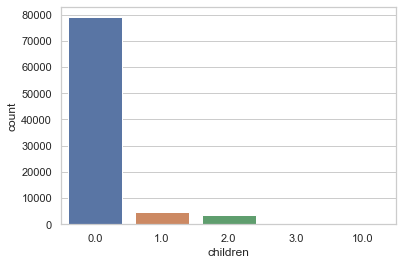

In [19]:
"""
    - Analysis of "children" Feature
    - ID of the travel agency that made the booking
"""
print("Missing values in 'children' column: ", missing_col['children'].isnull().sum())
print("Not missing values in 'children' column: ",missing_col['children'].notnull().sum())

### children
print("value \t count of children \n", missing_col['children'].value_counts(dropna=False))
sns.countplot(x="children", data=missing_col)
stat_summary(missing_col['children'])

#### Replacing <font color=green>'10' children and NaN with '1' child</font> feature

In [20]:
# Replace NaN with 1 child
new_hotel_data['children'] = new_hotel_data['children'].replace(np.nan, 1)

# Replace 10 children with 1 child
new_hotel_data['children'] = new_hotel_data['children'].replace(to_replace = 10, value = 1) 

print("value count of children :", new_hotel_data['children'].value_counts(dropna=False))
display(new_hotel_data[new_hotel_data.children.isnull()])

value count of children : 0.0    79028
1.0     4700
2.0     3593
3.0       75
Name: children, dtype: int64


,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,assigned_room_type,booking_changes,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date


In [21]:
"""
    - Analysis of "country" Feature
    - Country of origin. Categories are represented in the ISO 3155–3:2013 format
"""
print("Missing values in 'country' column: ", missing_col['country'].isnull().sum())
print("Not missing values in 'country' column: ",missing_col['country'].notnull().sum())

print(missing_col['country'].value_counts(dropna=False))
country_check = missing_col['country'].unique()
country_check

"""
 - Its too complicated to repalce NaN with any country
 - It's okay to remove the country column

"""


Missing values in 'country' column:  452
Not missing values in 'country' column:  86944
PRT    27453
GBR    10433
FRA     8837
ESP     7252
DEU     5387
       ...  
LCA        1
HND        1
SLE        1
KIR        1
ASM        1
Name: country, Length: 178, dtype: int64


"\n - Its too complicated to repalce NaN with any country\n - It's okay to remove the country column\n\n"

#### Removing <font color=red>'country'</font> feature

In [22]:
##  Deleting 'country' colum
# print("Name of all columns: \n", new_hotel_data.columns.tolist())
new_hotel_data = new_hotel_data.drop('country', axis=1)
# print("\n\nName of all columns: \n", new_hotel_data.columns.tolist())

In [23]:
print(new_hotel_data.shape[1])

29


##### D. Analysis of other independent Features

In [24]:
# print(" Columns names and their types: \n", hotel_data.dtypes)

num_int_type = new_hotel_data.select_dtypes(include='int64').columns.tolist()
print("\nNumeric-Integer Types columns name: \n", num_int_type)

num_float_type = new_hotel_data.select_dtypes(include='float64').columns.tolist()
print("\nNumeric-Float Types columns name: \n", num_float_type)

num_type = num_int_type + num_float_type
print("\nNumeric Types columns name: \n", num_type)

cat_object_type = new_hotel_data.select_dtypes(include='object').columns.tolist()
print("\n\nCategorical Types columns name: \n", cat_object_type)


Numeric-Integer Types columns name: 
 ['is_canceled', 'lead_time', 'arrival_date_year', 'arrival_date_week_number', 'arrival_date_day_of_month', 'stays_in_weekend_nights', 'stays_in_week_nights', 'adults', 'babies', 'is_repeated_guest', 'previous_cancellations', 'previous_bookings_not_canceled', 'booking_changes', 'days_in_waiting_list', 'required_car_parking_spaces', 'total_of_special_requests']

Numeric-Float Types columns name: 
 ['children', 'adr']

Numeric Types columns name: 
 ['is_canceled', 'lead_time', 'arrival_date_year', 'arrival_date_week_number', 'arrival_date_day_of_month', 'stays_in_weekend_nights', 'stays_in_week_nights', 'adults', 'babies', 'is_repeated_guest', 'previous_cancellations', 'previous_bookings_not_canceled', 'booking_changes', 'days_in_waiting_list', 'required_car_parking_spaces', 'total_of_special_requests', 'children', 'adr']


Categorical Types columns name: 
 ['hotel', 'arrival_date_month', 'meal', 'market_segment', 'distribution_channel', 'reserved_ro

Visulaize lead_time Feature


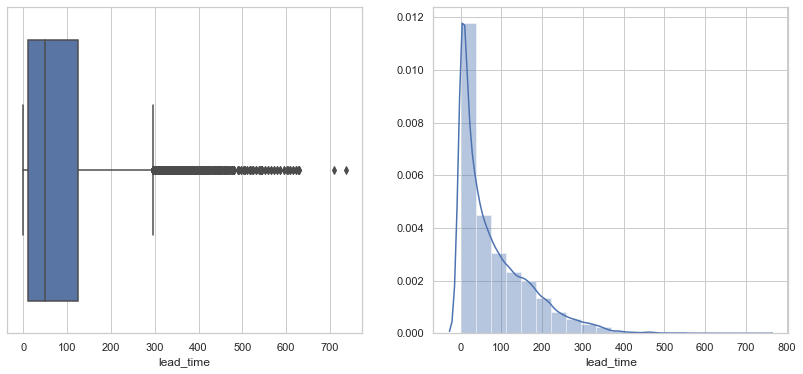

count    87396.000000
mean        79.891368
std         86.052325
min          0.000000
25%         11.000000
50%         49.000000
75%        125.000000
max        737.000000
Name: lead_time, dtype: float64
The upper and lower bounds for suspected outliers are 296.0 and -160.0


In [25]:
### lead_time
print('Visulaize lead_time Feature')
visualize_num_feature(new_hotel_data.lead_time)
stat_summary(new_hotel_data.lead_time)  

#### Lead Time

In [26]:
## "lead_time"
# The upper and lower bounds for suspected outliers are 296.0 and -160.0
# lower outlier -160.0 does not make sense - I will explain why we are getting this
# I am just choosing
remain_lead_time = new_hotel_data.lead_time < 300
print(remain_lead_time.shape)
new_hotel_data = new_hotel_data[remain_lead_time]
print(new_hotel_data.shape)

(87396,)
(85078, 29)


Visulaize lead_time Feature


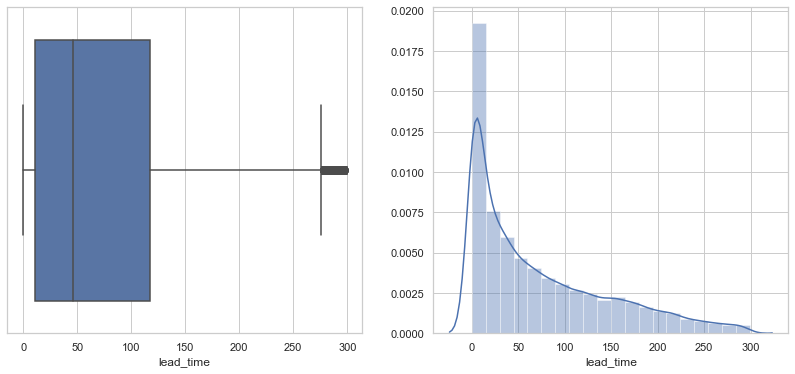

count    85078.000000
mean        72.435953
std         73.638806
min          0.000000
25%         11.000000
50%         46.000000
75%        117.000000
max        299.000000
Name: lead_time, dtype: float64
The upper and lower bounds for suspected outliers are 276.0 and -148.0


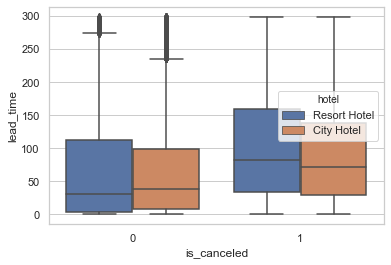

In [27]:
print('Visulaize lead_time Feature')
visualize_num_feature(new_hotel_data.lead_time)
stat_summary(new_hotel_data.lead_time) 

sns.boxplot(x = 'is_canceled', y = 'lead_time', data = new_hotel_data, hue='hotel')

#### Arrival Date Year

Visulaize arrival_date_year Feature


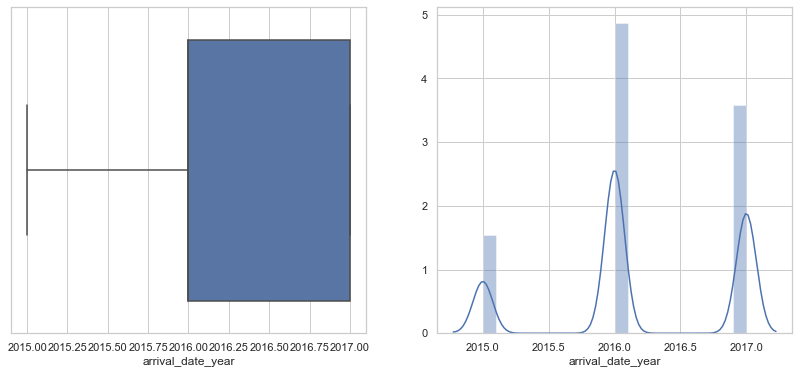

count    85078.000000
mean      2016.203178
std          0.686317
min       2015.000000
25%       2016.000000
50%       2016.000000
75%       2017.000000
max       2017.000000
Name: arrival_date_year, dtype: float64
The upper and lower bounds for suspected outliers are 2018.5 and 2014.5


In [28]:
### arrival_date_year
print('Visulaize arrival_date_year Feature')
visualize_num_feature(new_hotel_data.arrival_date_year)
stat_summary(new_hotel_data.arrival_date_year) 

#### Encoding <font color=green>'arrival_date_year'</font> feature

In [29]:
## "arrival_date_year"
# Its has 3-different years like, "2015", "2016", "2017"
print(new_hotel_data.arrival_date_year.unique().tolist())
print(new_hotel_data.arrival_date_year.dtypes)

# "2015", "2016", "2017" are the big number and will effect model learning
new_hotel_data = new_hotel_data.replace({'arrival_date_year': {2015: 1, 2016: 2, 2017: 3}})
new_hotel_data.head()

[2015, 2016, 2017]
int64


,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,assigned_room_type,booking_changes,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
2,Resort Hotel,0,7,1,July,27,1,0,1,1,...,C,0,No Deposit,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,1,July,27,1,0,1,1,...,A,0,No Deposit,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,1,July,27,1,0,2,2,...,A,0,No Deposit,0,Transient,98.0,0,1,Check-Out,2015-07-03
6,Resort Hotel,0,0,1,July,27,1,0,2,2,...,C,0,No Deposit,0,Transient,107.0,0,0,Check-Out,2015-07-03
7,Resort Hotel,0,9,1,July,27,1,0,2,2,...,C,0,No Deposit,0,Transient,103.0,0,1,Check-Out,2015-07-03


#### Analsysis of date columns

Visulaize arrival_date_week_number Feature


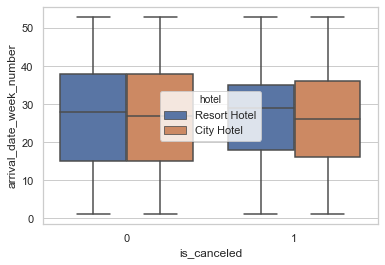

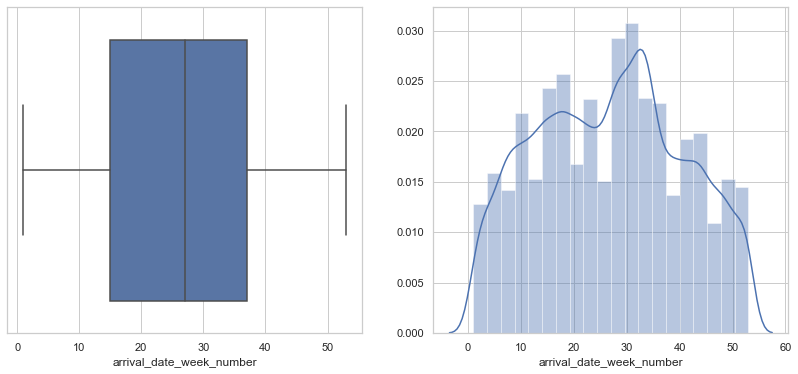

count    85078.000000
mean        26.744764
std         13.745458
min          1.000000
25%         15.000000
50%         27.000000
75%         37.000000
max         53.000000
Name: arrival_date_week_number, dtype: float64
The upper and lower bounds for suspected outliers are 70.0 and -18.0


In [30]:
date_col = new_hotel_data[['arrival_date_year','arrival_date_month', 
                          'arrival_date_week_number', 'arrival_date_day_of_month']]
date_col

sns.boxplot(x = 'is_canceled', y = date_col['arrival_date_week_number'], 
            data = new_hotel_data, hue='hotel')

### arrival_date_week_number
print('Visulaize arrival_date_week_number Feature')
visualize_num_feature(new_hotel_data['arrival_date_week_number'])
stat_summary(new_hotel_data['arrival_date_week_number']) 

## looks good

arrival_date_month,April,August,December,February,January,July,June,March,May,November,October,September
is_canceled,,,,,,,,,,,,
0,5470,7488,3736,4670,3643,6673,5227,5665,5743,3927,5072,4807
1,2372,3430,1319,1395,1016,3012,2199,1792,2301,1026,1562,1533


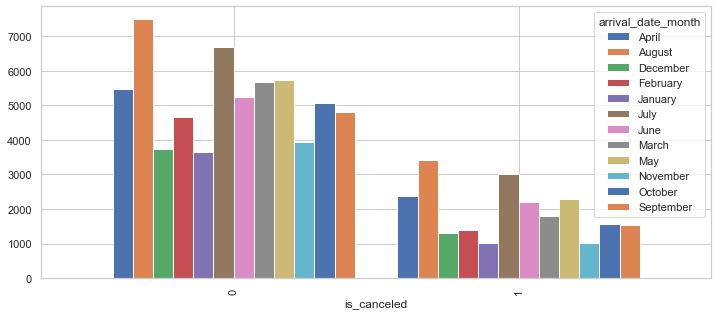

In [31]:
## arrival_date_month

table_date_month = pd.crosstab(index=new_hotel_data["is_canceled"], 
                                  columns=new_hotel_data["arrival_date_month"])

display(table_date_month )

table_date_month .plot(kind="bar", 
                 figsize=(12,5),
                 stacked=False,
                 width=0.85)

Visulaize arrival_date_day_of_month Feature


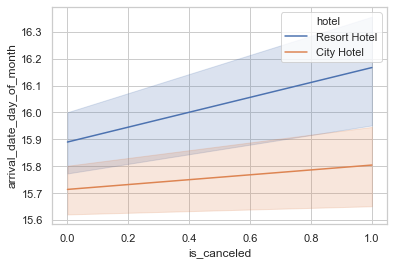

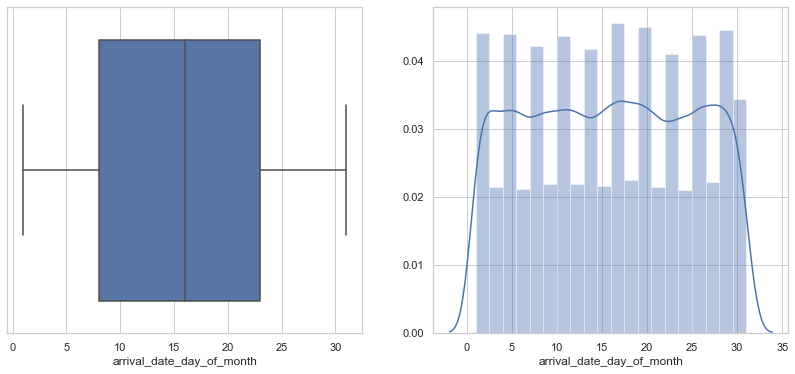

count    85078.000000
mean        15.822951
std          8.837333
min          1.000000
25%          8.000000
50%         16.000000
75%         23.000000
max         31.000000
Name: arrival_date_day_of_month, dtype: float64
The upper and lower bounds for suspected outliers are 45.5 and -14.5


In [32]:
sns.lineplot('is_canceled', y = date_col['arrival_date_day_of_month'], 
             data = new_hotel_data, hue='hotel')

### arrival_date_day_of_month
print('Visulaize arrival_date_day_of_month Feature')
visualize_num_feature(new_hotel_data['arrival_date_day_of_month'])
stat_summary(new_hotel_data['arrival_date_day_of_month']) 

# looks good

#### Analysis of 'stays_in_weekend_nights', 'stays_in_week_nights'

In [33]:
week_end = new_hotel_data[['stays_in_weekend_nights', 'stays_in_week_nights']]


# Checking for the stay at weekday nights at city hotel and resort hotel
display(pd.crosstab(hotel_data.is_canceled, hotel_data['stays_in_week_nights'], 
            margins=True, margins_name="Total"))

# Checking for the stay at weekend nights at city hotel and resort hotel
display(pd.crosstab(hotel_data.is_canceled, hotel_data['stays_in_weekend_nights'], 
            margins=True, margins_name="Total"))

## Comment:- Nothing interesting

stays_in_week_nights,0,1,2,3,4,5,6,7,8,9,...,30,32,33,34,35,40,41,42,50,Total
is_canceled,,,,,,,,,,,,,,,,,,,,,
0,5732,20479,18810,13753,6068,7216,917,706,436,136,...,4,1,1,1,1,1,1,1,1,75166
1,1913,9831,14874,8505,3495,3861,582,323,220,95,...,1,0,0,0,0,1,0,0,0,44224
Total,7645,30310,33684,22258,9563,11077,1499,1029,656,231,...,5,1,1,1,1,2,1,1,1,119390


stays_in_weekend_nights,0,1,2,3,4,5,6,7,8,9,10,12,13,14,16,18,19,Total
is_canceled,,,,,,,,,,,,,,,,,,
0,32497,19619,20823,815,1257,36,66,5,26,4,5,4,3,2,2,1,1,75166
1,19501,11007,12485,444,598,43,87,14,34,7,2,1,0,0,1,0,0,44224
Total,51998,30626,33308,1259,1855,79,153,19,60,11,7,5,3,2,3,1,1,119390


Visulaize stays_in_weekend_nights Feature


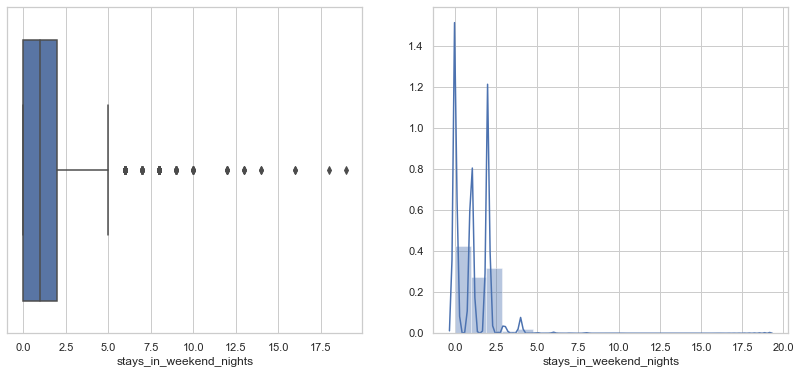

count    85078.000000
mean         0.996051
std          1.022754
min          0.000000
25%          0.000000
50%          1.000000
75%          2.000000
max         19.000000
Name: stays_in_weekend_nights, dtype: float64
The upper and lower bounds for suspected outliers are 5.0 and -3.0


In [34]:
### stays_in_weekend_nights
print('Visulaize stays_in_weekend_nights Feature')
visualize_num_feature(new_hotel_data['stays_in_weekend_nights'])
stat_summary(new_hotel_data.stays_in_weekend_nights) 

In [35]:
print("Before: ", new_hotel_data.shape)

stays_in_weekend_nights_extra = new_hotel_data['stays_in_weekend_nights'] < 5.0
# print(stays_in_weekend_nights_extra)
new_hotel_data = new_hotel_data[stays_in_weekend_nights_extra]
print("After: ", new_hotel_data.shape)

Before:  (85078, 29)
After:  (84797, 29)


Visulaize stays_in_week_nights Feature


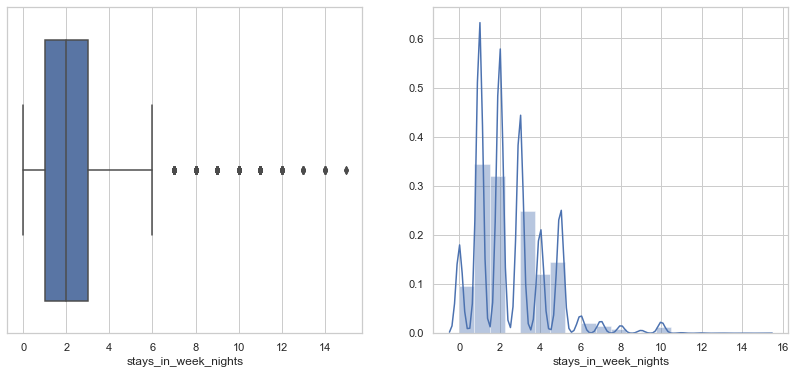

count    84797.000000
mean         2.547979
std          1.831542
min          0.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         15.000000
Name: stays_in_week_nights, dtype: float64
The upper and lower bounds for suspected outliers are 6.0 and -2.0


In [36]:
### stays_in_week_nights
print('Visulaize stays_in_week_nights Feature')
visualize_num_feature(new_hotel_data['stays_in_week_nights'])
stat_summary(new_hotel_data.stays_in_week_nights) 

In [37]:
print("Before: ", new_hotel_data.shape)

stays_in_week_nights_extra = new_hotel_data['stays_in_week_nights'] < 10
# print(stays_in_week_nights_extra)
new_hotel_data = new_hotel_data[stays_in_week_nights_extra]
print("After: ", new_hotel_data.shape)

Before:  (84797, 29)
After:  (83898, 29)


### Analysis of 
- 'is_repeated_guest', 
- 'previous_cancellations', 
- 'previous_bookings_not_canceled', 
- 'booking_changes'

In [38]:
df_check = new_hotel_data[['is_repeated_guest', 'previous_cancellations', 
                           'previous_bookings_not_canceled', 'booking_changes']]
df_check.head()


display(pd.crosstab(new_hotel_data['is_canceled'], new_hotel_data['is_repeated_guest'], 
            margins=True, margins_name="Total"))

display(pd.crosstab(new_hotel_data['is_canceled'], new_hotel_data['previous_cancellations'], 
            margins=True, margins_name="Total"))

display(pd.crosstab(new_hotel_data['is_canceled'], new_hotel_data['previous_bookings_not_canceled'], 
            margins=True, margins_name="Total"))

display(pd.crosstab(new_hotel_data['is_canceled'], new_hotel_data['booking_changes'], 
            margins=True, margins_name="Total"))


is_repeated_guest,0,1,Total
is_canceled,,,
0,58219,3120,61339
1,22311,248,22559
Total,80530,3368,83898


previous_cancellations,0,1,2,3,4,5,6,11,13,14,19,21,24,25,26,Total
is_canceled,,,,,,,,,,,,,,,,
0,60800,334,78,45,24,17,15,25,1,0,0,0,0,0,0,61339
1,21550,941,29,16,6,2,2,2,3,1,1,1,2,2,1,22559
Total,82350,1275,107,61,30,19,17,27,4,1,1,1,2,2,1,83898


previous_bookings_not_canceled,0,1,2,3,4,5,6,7,8,9,...,64,65,66,67,68,69,70,71,72,Total
is_canceled,,,,,,,,,,,,,,,,,,,,,
0,58027,1375,538,313,214,170,112,82,67,58,...,1,1,1,1,1,1,1,1,1,61339
1,22389,64,31,17,10,11,2,5,3,0,...,0,0,0,0,0,0,0,0,0,22559
Total,80416,1439,569,330,224,181,114,87,70,58,...,1,1,1,1,1,1,1,1,1,83898


booking_changes,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,Total
is_canceled,,,,,,,,,,,,,,,,,,,
0,48639,8945,2619,687,272,87,32,26,11,7,4,1,1,4,1,2,0,1,61339
1,20286,1393,645,127,62,20,15,3,4,1,1,0,0,0,1,0,1,0,22559
Total,68925,10338,3264,814,334,107,47,29,15,8,5,1,1,4,2,2,1,1,83898


count    83898.000000
mean         0.029989
std          0.374436
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max         26.000000
Name: previous_cancellations, dtype: float64
The upper and lower bounds for suspected outliers are 0.0 and 0.0


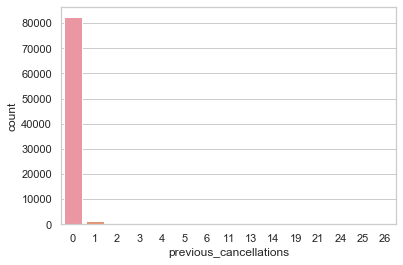

In [39]:
# ### previous_cancellations
sns.countplot(x="previous_cancellations", data=new_hotel_data)
stat_summary(new_hotel_data.previous_cancellations)

In [40]:
print("Before: ", new_hotel_data.shape)

print("\n\nprevious_cancellations and their frequencies:\n", new_hotel_data.previous_cancellations.value_counts())

prev_cancel_extra = new_hotel_data.previous_cancellations < 20
# print(prev_cancel_extra)

new_hotel_data = new_hotel_data[prev_cancel_extra]
print("\n\nAfter: ", new_hotel_data.shape)

Before:  (83898, 29)


previous_cancellations and their frequencies:
 0     82350
1      1275
2       107
3        61
4        30
11       27
5        19
6        17
13        4
25        2
24        2
26        1
21        1
19        1
14        1
Name: previous_cancellations, dtype: int64


After:  (83892, 29)


In [41]:
print("Before: ", new_hotel_data.shape)

print("\n\nprevious_bookings_not_canceled and their frequencies:\n", new_hotel_data.previous_bookings_not_canceled.\
      value_counts())

prev_not_cancel_extra = new_hotel_data.previous_bookings_not_canceled < 30
# print(prev_cancel_extra)


new_hotel_data = new_hotel_data[prev_not_cancel_extra]
print("\n\nAfter: ", new_hotel_data.shape)

Before:  (83892, 29)


previous_bookings_not_canceled and their frequencies:
 0     80410
1      1439
2       569
3       330
4       224
      ...  
47        1
36        1
49        1
50        1
63        1
Name: previous_bookings_not_canceled, Length: 73, dtype: int64


After:  (83841, 29)


count    83841.000000
mean         0.262962
std          0.694594
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max         17.000000
Name: booking_changes, dtype: float64
The upper and lower bounds for suspected outliers are 0.0 and 0.0


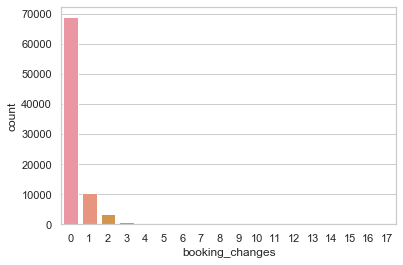

In [42]:
# ### booking_changes
sns.countplot(x="booking_changes", data=new_hotel_data)
stat_summary(new_hotel_data.booking_changes)


In [43]:
print("Before: ", new_hotel_data.shape)

print("\n\nbooking_changes and their frequencies:\n", new_hotel_data.booking_changes.value_counts())

booking_changes_extra = new_hotel_data.booking_changes < 10
# print(booking_changes_extra)

new_hotel_data = new_hotel_data[booking_changes_extra]
print("\n\nAfter: ", new_hotel_data.shape)

Before:  (83841, 29)


booking_changes and their frequencies:
 0     68887
1     10323
2      3262
3       812
4       334
5       107
6        47
7        29
8        15
9         8
10        5
13        4
14        2
15        2
16        1
11        1
12        1
17        1
Name: booking_changes, dtype: int64


After:  (83824, 29)


### Analysis 
- "hotel" vs. "is_canceled"

In [44]:
# count of members checked out from the two hotels
pd.crosstab(new_hotel_data['hotel'], new_hotel_data['is_canceled'], 
            margins=True, margins_name="Total")

is_canceled,0,1,Total
hotel,,,
City Hotel,36735,15214,51949
Resort Hotel,24542,7333,31875
Total,61277,22547,83824


### Analysis 
- "reservation_status" vs. "is_canceled"

reservation_status,Canceled,Check-Out,No-Show,Total
is_canceled,,,,
0,0,61277,0,61277
1,21589,0,958,22547
Total,21589,61277,958,83824


Text(0, 0.5, 'Count')

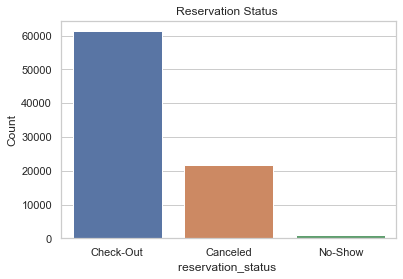

In [45]:
#  count of members canceled and no-show in those two hotels
display(pd.crosstab(new_hotel_data['is_canceled'], new_hotel_data['reservation_status'], 
            margins=True, margins_name="Total"))

plt.figure(figsize=(6,4))
sns.set(style="whitegrid")
ax = sns.countplot(x="reservation_status", data = new_hotel_data, \
                   order = new_hotel_data['reservation_status'].value_counts().index)
plt.title('Reservation Status ')
plt.xlabel('reservation_status ')
plt.ylabel('Count') 

### Analysis 
- "reservation_status_date" vs. "is_canceled"

In [46]:
#  count of members canceled and no-show in those two hotels
display(pd.crosstab(new_hotel_data['is_canceled'], new_hotel_data['reservation_status_date'], 
            margins=True, margins_name="Total"))

reservation_status_date,2014-10-17,2014-11-18,2015-01-01,2015-01-20,2015-01-21,2015-01-22,2015-01-28,2015-01-29,2015-01-30,2015-02-02,...,2017-09-02,2017-09-03,2017-09-04,2017-09-05,2017-09-06,2017-09-07,2017-09-08,2017-09-09,2017-09-10,Total
is_canceled,,,,,,,,,,,,,,,,,,,,,
0,0,0,0,0,0,0,0,0,0,0,...,62,70,35,21,15,14,2,4,3,61277
1,5,1,18,1,2,2,1,1,1,1,...,0,0,0,0,0,0,0,0,0,22547
Total,5,1,18,1,2,2,1,1,1,1,...,62,70,35,21,15,14,2,4,3,83824


#### Removing <font color=red>'reservation_status_date'</font> feature

In [47]:
##  Deleting 'reservation_status_date' column
new_hotel_data = new_hotel_data.drop('reservation_status_date', axis=1)

### Analysis 
- "deposit_type" vs. "is_canceled"

In [48]:
pd.crosstab(new_hotel_data['is_canceled'], new_hotel_data['deposit_type'], 
            margins=True, margins_name="Total")

deposit_type,No Deposit,Non Refund,Refundable,Total
is_canceled,,,,
0,61148,55,74,61277
1,21820,705,22,22547
Total,82968,760,96,83824


### Analysis 
- "required_car_parking_spaces" vs. "is_canceled"

In [49]:
### required_car_parking_spaces
display(pd.crosstab(new_hotel_data['is_canceled'], new_hotel_data['required_car_parking_spaces'], 
            margins=True, margins_name="Total"))

print(new_hotel_data['required_car_parking_spaces'].value_counts(dropna=False))

required_car_parking_spaces,0,1,2,3,8,Total
is_canceled,,,,,,
0,54123,7125,25,2,2,61277
1,22547,0,0,0,0,22547
Total,76670,7125,25,2,2,83824


0    76670
1     7125
2       25
8        2
3        2
Name: required_car_parking_spaces, dtype: int64


#### Replacing <font color=green>'8' parking space with '0' </font>

0    76672
1     7125
2       25
3        2
Name: required_car_parking_spaces, dtype: int64


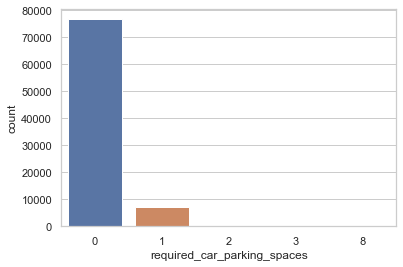

In [50]:
# bar plot
sns.countplot(x="required_car_parking_spaces", data=new_hotel_data)

# Replace 8 parking spaces with 0
new_hotel_data['required_car_parking_spaces'] = new_hotel_data['required_car_parking_spaces'].replace(
    to_replace = 8, value = 0) 

print(new_hotel_data['required_car_parking_spaces'].value_counts(dropna=False))

### Analysis 
- 'total_of_special_requests' vs. 'is_canceled'

In [51]:
display(pd.crosstab(new_hotel_data['is_canceled'], new_hotel_data['total_of_special_requests'], 
            margins=True, margins_name="Total"))

total_of_special_requests,0,1,2,3,4,5,Total
is_canceled,,,,,,,
0,28276,21845,9015,1840,268,33,61277
1,13600,6206,2337,370,32,2,22547
Total,41876,28051,11352,2210,300,35,83824


Visulaize total_of_special_requests Feature


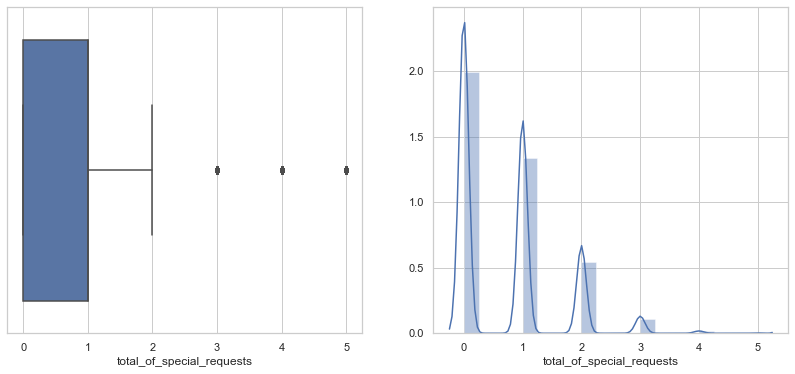

count    83824.000000
mean         0.700993
std          0.830632
min          0.000000
25%          0.000000
50%          1.000000
75%          1.000000
max          5.000000
Name: total_of_special_requests, dtype: float64
The upper and lower bounds for suspected outliers are 2.5 and -1.5
Before:  (83824, 28)


total_of_special_requests and their frequencies:
 0    41876
1    28051
2    11352
3     2210
4      300
5       35
Name: total_of_special_requests, dtype: int64


After:  (83789, 28)


In [52]:
### total_of_special_requests
print('Visulaize total_of_special_requests Feature')
visualize_num_feature(new_hotel_data.total_of_special_requests)
stat_summary(new_hotel_data.total_of_special_requests) 

print("Before: ", new_hotel_data.shape)

print("\n\ntotal_of_special_requests and their frequencies:\n", new_hotel_data. \
      total_of_special_requests.value_counts(dropna=False))

special_requests_extra = new_hotel_data.total_of_special_requests < 5
# print(booking_changes_extra)

new_hotel_data = new_hotel_data[special_requests_extra]
print("\n\nAfter: ", new_hotel_data.shape)

### Analysis
- 'adults' vs 'is_canceled'

adults,0,1,2,3,4
is_canceled,,,,,
0,270,12919,44170,3840,45
1,87,2945,17550,1950,13


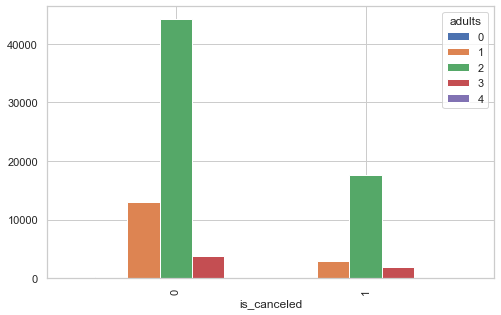

In [53]:
table_adults = pd.crosstab(index=new_hotel_data["is_canceled"], 
                                  columns=new_hotel_data["adults"])

display(table_adults)

table_adults.plot(kind="bar", 
                 figsize=(8,5),
                 stacked=False,
                 width=0.85)

count    83789.000000
mean         1.872632
std          0.511886
min          0.000000
25%          2.000000
50%          2.000000
75%          2.000000
max          4.000000
Name: adults, dtype: float64
The upper and lower bounds for suspected outliers are 2.0 and 2.0
No. of Adults and  their frequencies:
 2    61720
1    15864
3     5790
0      357
4       58
Name: adults, dtype: int64


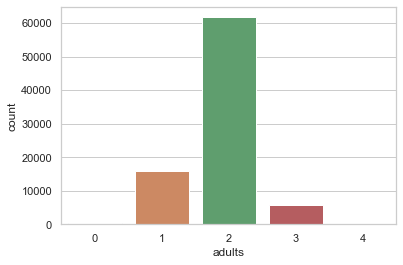

In [54]:
### adults
sns.countplot(x="adults", data=new_hotel_data)
stat_summary(new_hotel_data['adults'])
print("No. of Adults and  their frequencies:\n", new_hotel_data['adults'].value_counts(dropna=False))

#### Babies

No. of Babies and  their frequencies:
 0     82906
1       868
2        13
10        1
9         1
Name: babies, dtype: int64
count    83789.000000
mean         0.010896
std          0.114112
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max         10.000000
Name: babies, dtype: float64
The upper and lower bounds for suspected outliers are 0.0 and 0.0


'\n    -comment: Most of time babies number is 0, so it will be good to delete this column\n'

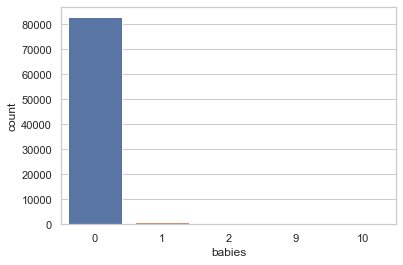

In [55]:
# ### babies
print("No. of Babies and  their frequencies:\n", new_hotel_data.babies.value_counts())
sns.countplot(x="babies", data=new_hotel_data)
stat_summary(new_hotel_data.babies)

"""
    -comment: Most of time babies number is 0, so it will be good to delete this column
"""

#### Days in waiting list

0      83040
63        53
87        25
44        23
15        22
       ...  
81         1
79         1
142        1
117        1
223        1
Name: days_in_waiting_list, Length: 114, dtype: int64
count    83789.000000
mean         0.609531
std          8.290221
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max        259.000000
Name: days_in_waiting_list, dtype: float64
The upper and lower bounds for suspected outliers are 0.0 and 0.0


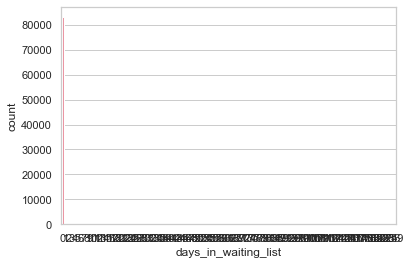

In [56]:
### days_in_waiting_list
print(new_hotel_data['days_in_waiting_list'].value_counts(dropna=False))

"""
    -comment: numbers are very unique its will be hard to predict any pattern
"""
sns.countplot(x="days_in_waiting_list", data=new_hotel_data)
stat_summary(new_hotel_data.days_in_waiting_list)

#### Removing 
<font color=red>
- 'babies', 
- 'days_in_waiting_list'
</font>

In [57]:
new_hotel_data = new_hotel_data.drop(['babies', 'days_in_waiting_list'], axis=1)
new_hotel_data.shape

(83789, 26)

Visulaize adr Feature


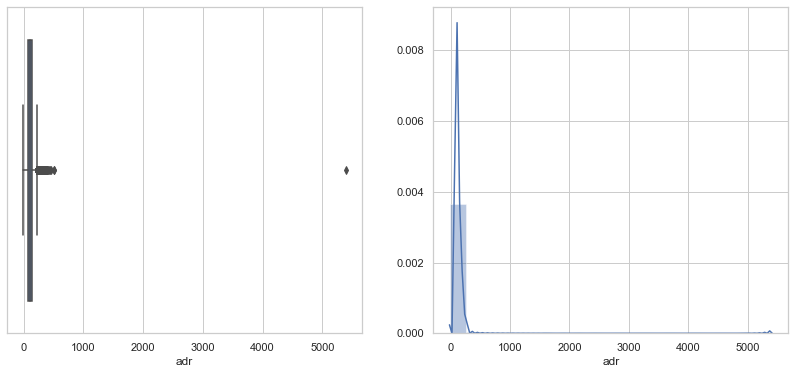

count    83789.000000
mean       106.889593
std         55.295379
min         -6.380000
25%         72.500000
50%         99.000000
75%        135.000000
max       5400.000000
Name: adr, dtype: float64
The upper and lower bounds for suspected outliers are 228.75 and -21.25


'\nAverage Daily Rate as defined by dividing the sum of all \nlodging transactions by the total number of staying nights\n\n'

In [58]:
### adr
print('Visulaize adr Feature')
visualize_num_feature(new_hotel_data['adr'])
stat_summary(new_hotel_data['adr']) 

"""
Average Daily Rate as defined by dividing the sum of all 
lodging transactions by the total number of staying nights

"""
## may need to do imputation

In [59]:
## "adr"
remain_adr = new_hotel_data['adr'] < 300
print(remain_adr.shape)
new_hotel_data = new_hotel_data[remain_adr]
print(new_hotel_data.shape)



(83789,)
(83522, 26)


Visulaize lead_time Feature


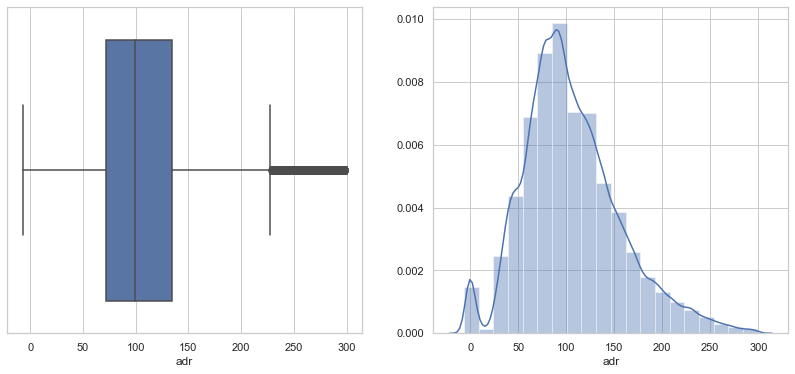

count    83522.000000
mean       106.117535
std         50.701377
min         -6.380000
25%         72.380000
50%         99.000000
75%        134.400000
max        299.430000
Name: adr, dtype: float64
The upper and lower bounds for suspected outliers are 227.43 and -20.65000000000002


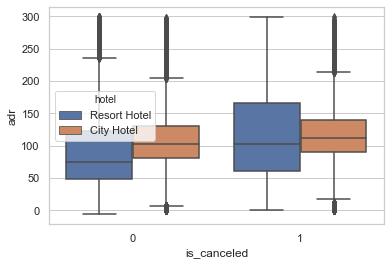

In [60]:
print('Visulaize lead_time Feature')
visualize_num_feature(new_hotel_data['adr'])
stat_summary(new_hotel_data['adr']) 

sns.boxplot(x = 'is_canceled', y = 'adr', data = new_hotel_data, hue='hotel')

### Analysis
- Customer Type Feature

customer_type,Contract,Group,Transient,Transient-Party
is_canceled,,,,
0,2240,474,49175,9172
1,429,34,20420,1578


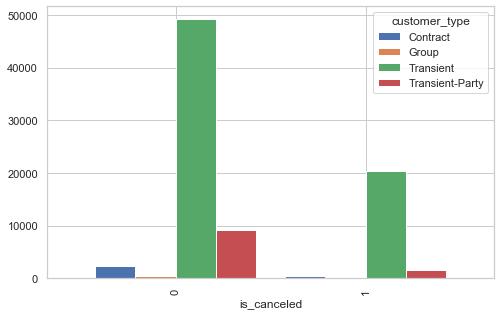

In [61]:
# Customer Type
table_customer_type = pd.crosstab(index=new_hotel_data["is_canceled"], 
                                  columns=new_hotel_data["customer_type"])

display(table_customer_type)

table_customer_type.plot(kind="bar", 
                 figsize=(8,5),
                 stacked=False,
                        width=0.85)

### Analysis
- Market Segment

market_segment,Aviation,Complementary,Corporate,Direct,Groups,Offline TA/TO,Online TA,Undefined
is_canceled,,,,,,,,
0,170,606,3616,9856,3166,10890,32757,0
1,44,88,498,1624,1027,1820,17358,2


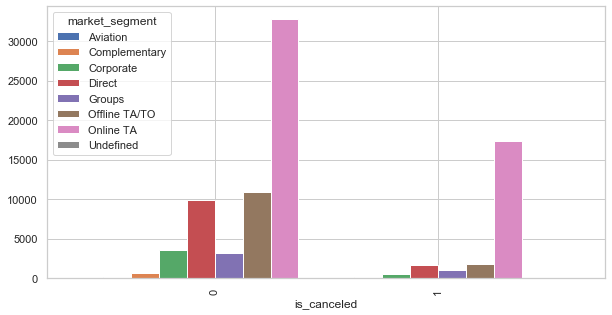

In [62]:
# Market segment
table_market_segment = pd.crosstab(index=new_hotel_data["is_canceled"], 
                                  columns=new_hotel_data["market_segment"])

display(table_market_segment)

table_market_segment.plot(kind="bar", 
                 figsize=(10,5),
                 stacked=False,
                         width=1)

## 1.4 Feature Selection 
### 1.4.1 Numerical Columns
- A. Correlation Matrix and Heat-Map
- B. Recursive Feature Elimination
- C. Feature Importance (ExtraTreesClassifier())

### A. Correlation of Numerical Features

 Heat map for categorical columns: 


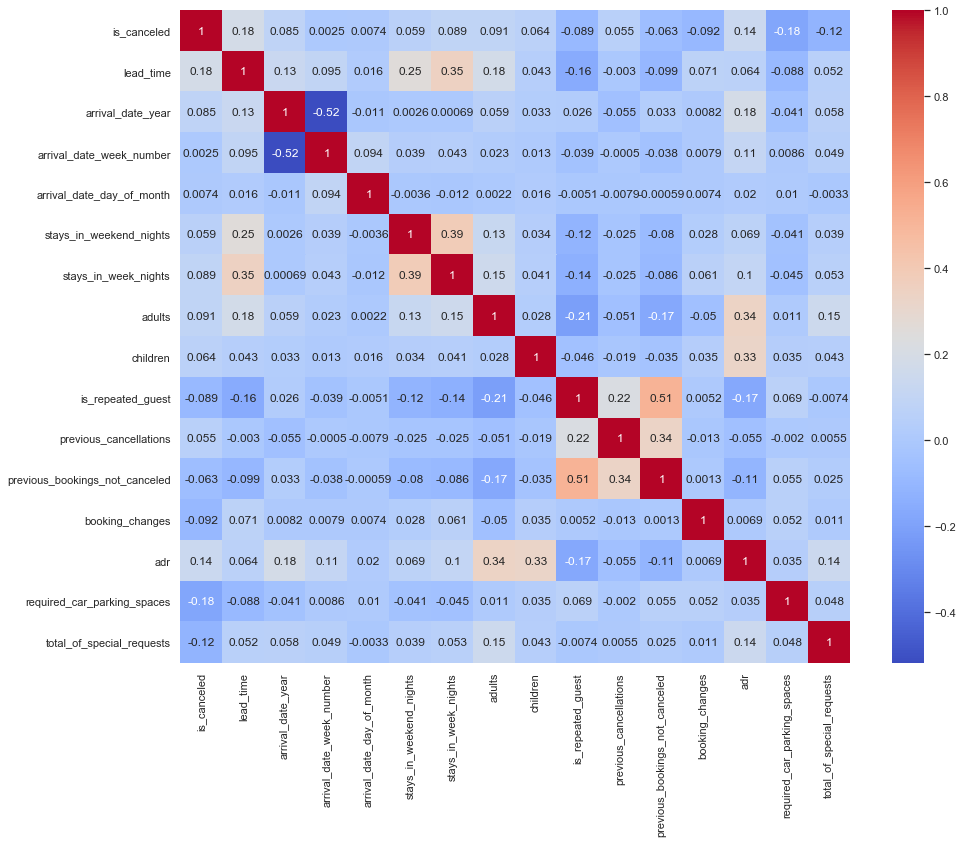

In [63]:
### Correlation

corr_matrix = new_hotel_data.corr()
# display(corr_matrix)

print(" Heat map for categorical columns: ")
plt.subplots(figsize=(15,12))
display(sns.heatmap(corr_matrix, annot = True, cmap= 'coolwarm'))

### B. Some more plots

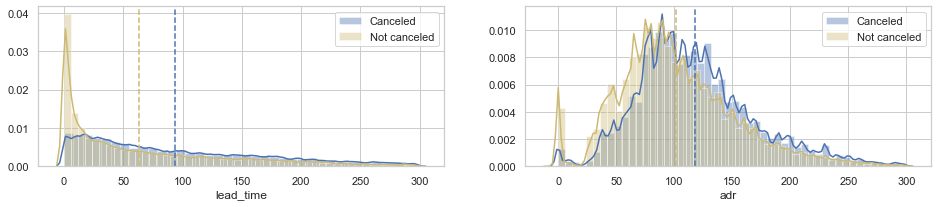

In [64]:
# Subsetting by is_canceled!
canceled = new_hotel_data["is_canceled"] == 1
not_canceled = new_hotel_data["is_canceled"] == 0

# Creating the plots
# features = ['lead_time', 'adr', 
#             'previous_cancellations', 'previous_bookings_not_canceled',
#            'is_repeated_guest']
features = ['lead_time', 'adr']
labels = ['Canceled', 'Not canceled']

def creating_plots(features, labels):
    plt.figure(figsize=(16,10))
    for feature in features:
        plt.subplot(3, 2, features.index(feature)+1)
        sns.distplot(new_hotel_data[feature][canceled], label=labels[0], color="b", kde_kws={'bw':2})
        sns.distplot(new_hotel_data[feature][not_canceled], label=labels[1], color="y", kde_kws={'bw':2})
        plt.axvline(new_hotel_data[feature][canceled].mean(), linestyle = '--', color="b")
        plt.axvline(new_hotel_data[feature][not_canceled].mean(), linestyle = '--', color="y")
        plt.legend()

creating_plots(features, labels)

#### Sort out the Important Numerical Features

In [65]:
num_fea_corr = new_hotel_data.corr()["is_canceled"]
num_fea_corr.abs().sort_values(ascending=False)

is_canceled                       1.000000
lead_time                         0.184447
required_car_parking_spaces       0.184259
adr                               0.139985
total_of_special_requests         0.117945
booking_changes                   0.092233
adults                            0.091076
is_repeated_guest                 0.089401
stays_in_week_nights              0.089397
arrival_date_year                 0.085322
children                          0.063971
previous_bookings_not_canceled    0.062835
stays_in_weekend_nights           0.058816
previous_cancellations            0.054822
arrival_date_day_of_month         0.007441
arrival_date_week_number          0.002535
Name: is_canceled, dtype: float64

### C. Recursive Feature Elimination

In [66]:
num_type = new_hotel_data.select_dtypes(include = [np.number]).columns.tolist()
X_numeric = new_hotel_data[num_type]

X_numeric = X_numeric.drop('is_canceled', axis=1)
display(X_numeric.head())
y = new_hotel_data['is_canceled']

## Scale the numeric variable using satnde
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_numeric_scale = pd.DataFrame(scaler.fit_transform(X_numeric), columns = X_numeric.columns)
display(X_numeric_scale.head())

# print(X_numeric.shape)
# print(X_numeric.info())

,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,adr,required_car_parking_spaces,total_of_special_requests
2,7,1,27,1,0,1,1,0.0,0,0,0,0,75.0,0,0
3,13,1,27,1,0,1,1,0.0,0,0,0,0,75.0,0,0
4,14,1,27,1,0,2,2,0.0,0,0,0,0,98.0,0,1
6,0,1,27,1,0,2,2,0.0,0,0,0,0,107.0,0,0
7,9,1,27,1,0,2,2,0.0,0,0,0,0,103.0,0,1


,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,adr,required_car_parking_spaces,total_of_special_requests
0,-0.883178,-1.752786,0.019641,-1.68145,-1.032671,-0.882032,-1.703935,-0.302471,-0.202916,-0.087689,-0.128311,-0.38786,-0.613745,-0.303806,-0.846016
1,-0.801253,-1.752786,0.019641,-1.68145,-1.032671,-0.882032,-1.703935,-0.302471,-0.202916,-0.087689,-0.128311,-0.38786,-0.613745,-0.303806,-0.846016
2,-0.787599,-1.752786,0.019641,-1.68145,-1.032671,-0.279708,0.251869,-0.302471,-0.202916,-0.087689,-0.128311,-0.38786,-0.160106,-0.303806,0.365342
3,-0.978758,-1.752786,0.019641,-1.68145,-1.032671,-0.279708,0.251869,-0.302471,-0.202916,-0.087689,-0.128311,-0.38786,0.017405,-0.303806,-0.846016
4,-0.855870,-1.752786,0.019641,-1.68145,-1.032671,-0.279708,0.251869,-0.302471,-0.202916,-0.087689,-0.128311,-0.38786,-0.061489,-0.303806,0.365342


In [67]:

from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

# create a base classifier used to evaluate a subset of attributes
model = LogisticRegression(solver='lbfgs', random_state=42, n_jobs=-1)

# create the RFE model and select 3 attributes
rfe = RFE(model, 3)
rfe = rfe.fit(X_numeric_scale, y)

# summarize the selection of the attributes
print(rfe.support_)
print(rfe.ranking_)

[False False False False False False False False False  True  True False
 False  True False]
[ 4  7 12 11 13 10  8  9  6  1  1  5  2  1  3]


### D. Feature Importance (ExtraTreesClassifier())

[0.2186287  0.02293929 0.1216398  0.12912923 0.03854602 0.07790574
 0.02751956 0.01539805 0.00561381 0.02749216 0.00408591 0.03614516
 0.18806463 0.0319068  0.05498514]


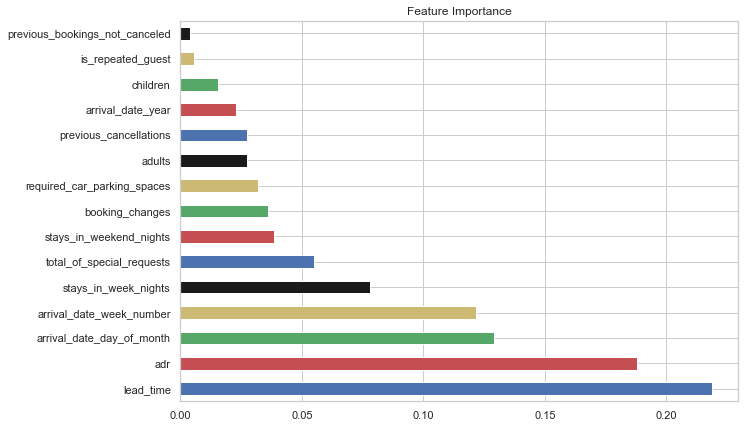

In [68]:
from sklearn.ensemble import ExtraTreesClassifier

# fit an Extra Trees model to the data
model = ExtraTreesClassifier()
model.fit(X_numeric_scale, y)
# display the relative importance of each attribute
print(model.feature_importances_)

# feature_importances of tree based classifiers
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X_numeric_scale.columns)

from itertools import cycle, islice
my_colors = list(islice(cycle(['b', 'r', 'g', 'y', 'k']), None, len(feat_importances)))
plt.figure(figsize = (10, 7))
feat_importances.nlargest(15).plot(kind='barh', color=my_colors, title = 'Feature Importance')

# feat_importances.nlargest(15).sns.countplot()
plt.show()

In [69]:
num_type

['is_canceled',
 'lead_time',
 'arrival_date_year',
 'arrival_date_week_number',
 'arrival_date_day_of_month',
 'stays_in_weekend_nights',
 'stays_in_week_nights',
 'adults',
 'children',
 'is_repeated_guest',
 'previous_cancellations',
 'previous_bookings_not_canceled',
 'booking_changes',
 'adr',
 'required_car_parking_spaces',
 'total_of_special_requests']

## Based on Feature Importance
### Removing  


## 1.4.2 Categorical Features
- A. Chi Square Test & Fisher Score


### A. Chi Square Test

In [70]:
cat_object_type = new_hotel_data.select_dtypes(include='object').columns.tolist()
print("Categorical Types columns name: \n", cat_object_type)

X_cat = new_hotel_data[cat_object_type]
display(X_cat.head())

y = new_hotel_data['is_canceled']

Categorical Types columns name: 
 ['hotel', 'arrival_date_month', 'meal', 'market_segment', 'distribution_channel', 'reserved_room_type', 'assigned_room_type', 'deposit_type', 'customer_type', 'reservation_status']


,hotel,arrival_date_month,meal,market_segment,distribution_channel,reserved_room_type,assigned_room_type,deposit_type,customer_type,reservation_status
2,Resort Hotel,July,BB,Direct,Direct,A,C,No Deposit,Transient,Check-Out
3,Resort Hotel,July,BB,Corporate,Corporate,A,A,No Deposit,Transient,Check-Out
4,Resort Hotel,July,BB,Online TA,TA/TO,A,A,No Deposit,Transient,Check-Out
6,Resort Hotel,July,BB,Direct,Direct,C,C,No Deposit,Transient,Check-Out
7,Resort Hotel,July,FB,Direct,Direct,C,C,No Deposit,Transient,Check-Out


In [71]:
# import labelencoder
from sklearn.preprocessing import LabelEncoder

# instantiate labelencoder object
le = LabelEncoder()

# apply le on categorical feature columns
X_cat = X_cat.apply(lambda col: le.fit_transform(col))
X_cat.head(10)

,hotel,arrival_date_month,meal,market_segment,distribution_channel,reserved_room_type,assigned_room_type,deposit_type,customer_type,reservation_status
2,1,5,0,3,1,0,2,0,2,1
3,1,5,0,2,0,0,0,0,2,1
4,1,5,0,6,3,0,0,0,2,1
6,1,5,0,3,1,2,2,0,2,1
7,1,5,1,3,1,2,2,0,2,1
8,1,5,0,6,3,0,0,0,2,0
9,1,5,2,5,3,3,3,0,2,0
10,1,5,0,6,3,4,4,0,2,0
11,1,5,2,6,3,3,3,0,2,1
12,1,5,0,6,3,3,4,0,2,1


In [72]:

# # import OneHotEncoder
# from sklearn.preprocessing import OneHotEncoder

# # instantiate OneHotEncoder
# ohe = OneHotEncoder(sparse=True, handle_unknown='ignore')

# # apply OneHotEncoder on categorical feature columns
# X_ohe = pd.DataFrame(ohe.fit_transform(X_cat)) # It returns an numpy array
# X_ohe

In [73]:
# df = pd.DataFrame(data=X_ohe)
# df

In [74]:
X = X_cat.copy()
print(X.shape)
y = new_hotel_data['is_canceled']
print(y.shape)

(83522, 10)
(83522,)


In [75]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [76]:
from sklearn.feature_selection import chi2

f_score = chi2(X_train, y_train)
f_score

(array([1.95819287e+02, 2.62754458e+02, 3.28644457e+02, 8.14147224e+02,
        5.27412545e+02, 4.57044478e+02, 5.88453553e+02, 1.05682184e+03,
        1.00074731e+01, 1.45755743e+04]),
 array([1.70688483e-044, 4.30647554e-059, 1.89682929e-073, 4.53141114e-179,
        1.03244337e-116, 2.11382132e-101, 5.43605294e-130, 8.00908559e-232,
        1.55906286e-003, 0.00000000e+000]))

In [77]:
p_values = pd.Series(f_score[1], index = X_train.columns)
p_values.sort_values(ascending = True, inplace=True)
# p_values = p_values.drop(labels = 'customer_type' )
p_values

## Comment: Lowest the p-values---- more important it is

reservation_status       0.000000e+00
deposit_type            8.009086e-232
market_segment          4.531411e-179
assigned_room_type      5.436053e-130
distribution_channel    1.032443e-116
reserved_room_type      2.113821e-101
meal                     1.896829e-73
arrival_date_month       4.306476e-59
hotel                    1.706885e-44
customer_type            1.559063e-03
dtype: float64

In [78]:
type(p_values)

pandas.core.series.Series

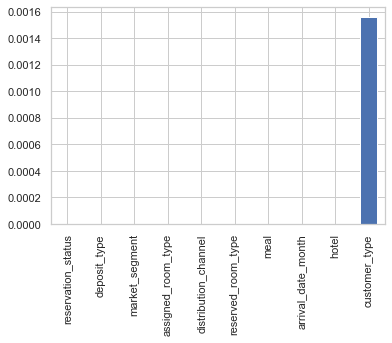

In [79]:
# plot
p_values.plot.bar()

##### From above Fisher Score and Chi2 test
#### Removing 
<font color=red>
'deposit_type', 'reservation_status'
</font>


In [80]:
new_hotel_data = new_hotel_data.drop(['reservation_status', 'deposit_type'], axis=1)
new_hotel_data.shape

(83522, 24)

## After Data Cleaning:

In [81]:
print("Number of records (rows) Hotel Bookings Demand Datasets: ", new_hotel_data.shape[0])
print("Number of features (columns) Hotel Bookings Demand Datasets: ", new_hotel_data.shape[1])
print("\nColumns names of the hotel booking datasets: \n", new_hotel_data.columns.tolist())

Number of records (rows) Hotel Bookings Demand Datasets:  83522
Number of features (columns) Hotel Bookings Demand Datasets:  24

Columns names of the hotel booking datasets: 
 ['hotel', 'is_canceled', 'lead_time', 'arrival_date_year', 'arrival_date_month', 'arrival_date_week_number', 'arrival_date_day_of_month', 'stays_in_weekend_nights', 'stays_in_week_nights', 'adults', 'children', 'meal', 'market_segment', 'distribution_channel', 'is_repeated_guest', 'previous_cancellations', 'previous_bookings_not_canceled', 'reserved_room_type', 'assigned_room_type', 'booking_changes', 'customer_type', 'adr', 'required_car_parking_spaces', 'total_of_special_requests']


## List of numerical and categorical columns:

In [82]:
# print(" Columns names and their types: \n", hotel_data.dtypes)

num_int_type = new_hotel_data.select_dtypes(include='int64').columns.tolist()
print("\nNumeric-Integer Types columns name: \n", num_int_type)

num_float_type = new_hotel_data.select_dtypes(include='float64').columns.tolist()
print("\nNumeric-Float Types columns name: \n", num_float_type)

cat_object_type = new_hotel_data.select_dtypes(include='object').columns.tolist()
print("\n\nCategorical Types columns name: \n", cat_object_type)


Numeric-Integer Types columns name: 
 ['is_canceled', 'lead_time', 'arrival_date_year', 'arrival_date_week_number', 'arrival_date_day_of_month', 'stays_in_weekend_nights', 'stays_in_week_nights', 'adults', 'is_repeated_guest', 'previous_cancellations', 'previous_bookings_not_canceled', 'booking_changes', 'required_car_parking_spaces', 'total_of_special_requests']

Numeric-Float Types columns name: 
 ['children', 'adr']


Categorical Types columns name: 
 ['hotel', 'arrival_date_month', 'meal', 'market_segment', 'distribution_channel', 'reserved_room_type', 'assigned_room_type', 'customer_type']


In [83]:
## Summary of numerical features
print("\nSummary of Statistics for numerical columns: ")
num_type = num_int_type + num_float_type
display(new_hotel_data[num_type].describe().T)
# display(new_hotel_data.describe(include = [np.number]).T)

## Summary of categorical features
print("\nSummary of Statistics for categorical columns: ")
display(new_hotel_data[cat_object_type].describe().T)
# display(new_hotel_data.describe(include = ['O']).T)

print('\n\nTypes of Hotels and their counts: \n')
print(new_hotel_data[cat_object_type].hotel.value_counts())

# just checking size for cat and num
print("\nTotal features after cleaning data: \n")
print(new_hotel_data[num_type].shape)
print(new_hotel_data[cat_object_type].shape)


Summary of Statistics for numerical columns: 


,count,mean,std,min,25%,50%,75%,max
is_canceled,83522.0,0.268923,0.443403,0.00,0.00,0.0,1.0,1.00
lead_time,83522.0,71.681557,73.237699,0.00,10.00,46.0,116.0,299.00
arrival_date_year,83522.0,2.202330,0.685958,1.00,2.00,2.0,3.0,3.00
arrival_date_week_number,83522.0,26.729700,13.761905,1.00,15.00,27.0,37.0,53.00
arrival_date_day_of_month,83522.0,15.847633,8.830308,1.00,8.00,16.0,24.0,31.00
stays_in_weekend_nights,83522.0,0.944841,0.914954,0.00,0.00,1.0,2.0,4.00
stays_in_week_nights,83522.0,2.464381,1.660245,0.00,1.00,2.0,3.0,9.00
adults,83522.0,1.871220,0.511302,0.00,2.00,2.0,2.0,4.00
is_repeated_guest,83522.0,0.039546,0.194892,0.00,0.00,0.0,0.0,1.00
previous_cancellations,83522.0,0.025694,0.293014,0.00,0.00,0.0,0.0,19.00



Summary of Statistics for categorical columns: 


,count,unique,top,freq
hotel,83522,2,City Hotel,51875
arrival_date_month,83522,12,August,10583
meal,83522,5,BB,65284
market_segment,83522,8,Online TA,50115
distribution_channel,83522,5,TA/TO,65933
reserved_room_type,83522,10,A,54240
assigned_room_type,83522,12,A,44288
customer_type,83522,4,Transient,69595




Types of Hotels and their counts: 

City Hotel      51875
Resort Hotel    31647
Name: hotel, dtype: int64

Total features after cleaning data: 

(83522, 16)
(83522, 8)


### Resetting index

In [84]:
new_hotel_data = new_hotel_data.reset_index(drop=True)

In [85]:
display(new_hotel_data.head())

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,customer_type,adr,required_car_parking_spaces,total_of_special_requests
0,Resort Hotel,0,7,1,July,27,1,0,1,1,...,0,0,0,A,C,0,Transient,75.0,0,0
1,Resort Hotel,0,13,1,July,27,1,0,1,1,...,0,0,0,A,A,0,Transient,75.0,0,0
2,Resort Hotel,0,14,1,July,27,1,0,2,2,...,0,0,0,A,A,0,Transient,98.0,0,1
3,Resort Hotel,0,0,1,July,27,1,0,2,2,...,0,0,0,C,C,0,Transient,107.0,0,0
4,Resort Hotel,0,9,1,July,27,1,0,2,2,...,0,0,0,C,C,0,Transient,103.0,0,1


###  1.5 Saving dataframe for Model Training 

In [86]:
new_hotel_data.to_csv('hotel.csv', index=False)